In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import

SyntaxError: invalid syntax (<ipython-input-15-afa4c10db35a>, line 6)

### Read CSV as Dataframes

In [16]:
df_g1 = pd.read_csv('data/Graph_1.csv', header=None)
df_g2 = pd.read_csv('data/Graph_2.csv', header=None)
df_g3 = pd.read_csv('data/Graph_3.csv', header=None)
df_g4 = pd.read_csv('data/Graph_4.csv', header=None)
df_g5 = pd.read_csv('data/Graph_5.csv', header=None)
df_g6 = pd.read_csv('data/Graph_6.csv', header=None)

G1 = df_g1.as_matrix()
G2 = df_g2.as_matrix()
G3 = df_g3.as_matrix()
G4 = df_g4.as_matrix()
G5 = df_g5.as_matrix()
G6 = df_g6.as_matrix()

/Users/vmullachery/anaconda/envs/dl2.7/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/vmullachery/anaconda/envs/dl2.7/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/vmullachery/anaconda/envs/dl2.7/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/vmullachery/anaconda/envs/dl2.7/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is

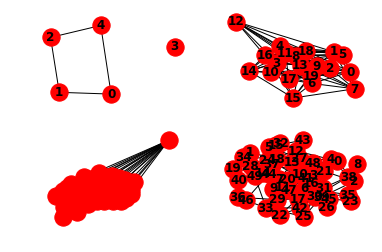

In [7]:
import networkx as nx
plt.subplot(221)
nx.draw(nx.from_numpy_matrix(G1), with_labels=True, font_weight='bold')

plt.subplot(222)
nx.draw(nx.from_numpy_matrix(G2), with_labels=True, font_weight='bold')

plt.subplot(223)
nx.draw(nx.from_numpy_matrix(G3), with_labels=False, font_weight='bold')

plt.subplot(224)
nx.draw(nx.from_numpy_matrix(G4), with_labels=True, font_weight='bold')

In [24]:
Dg1 = G1.sum(axis=0)
Lg1 = np.zeros_like(G1) + np.diag(Dg1) - G1
Lg1, Dg1, G1

(array([[ 2, -1,  0,  0, -1],
        [-1,  2, -1,  0,  0],
        [ 0, -1,  2,  0, -1],
        [ 0,  0,  0,  0,  0],
        [-1,  0, -1,  0,  2]]), array([2, 2, 2, 0, 2]), array([[0, 1, 0, 0, 1],
        [1, 0, 1, 0, 0],
        [0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0]]))

In [227]:
ng1 = nx.from_numpy_matrix(G1)
L = nx.normalized_laplacian_matrix(ng1)
#np.linalg.eigvals(L.A), 
L.todense(), nx.laplacian_matrix(ng1).todense()
#a = np.array([0, 1, 0, 0, 0])
#np.dot(a, L.toarray())
#e, v = np.linalg.eig(L.A)
#plt.scatter(range(len(e)), e)

(matrix([[ 1. , -0.5,  0. ,  0. , -0.5],
         [-0.5,  1. , -0.5,  0. ,  0. ],
         [ 0. , -0.5,  1. ,  0. , -0.5],
         [ 0. ,  0. ,  0. ,  0. ,  0. ],
         [-0.5,  0. , -0.5,  0. ,  1. ]]), matrix([[ 2, -1,  0,  0, -1],
         [-1,  2, -1,  0,  0],
         [ 0, -1,  2,  0, -1],
         [ 0,  0,  0,  0,  0],
         [-1,  0, -1,  0,  2]]))

In [51]:
v

array([[  5.00000000e-01,  -7.07106781e-01,  -5.00000000e-01,
          1.04862466e-16,   0.00000000e+00],
       [  5.00000000e-01,   2.42861287e-17,   5.00000000e-01,
         -7.07106781e-01,   0.00000000e+00],
       [  5.00000000e-01,   7.07106781e-01,  -5.00000000e-01,
         -1.04862466e-16,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00],
       [  5.00000000e-01,   1.07552856e-16,   5.00000000e-01,
          7.07106781e-01,   0.00000000e+00]])

In [93]:
si = np.argsort(e)
# 2nd eigenvalue, e[s[1]], eigenvector v[si[1]]

#e[4], si[1], (e[si[1]] >= 1e-15 ) + [0]*len(v)
#si[1], v[s[i]]
v[si[1]] , 
x = np.median(v[si[1]])
y = v[si[1]] > x
y + [0]*len(y)
# x = np.median(v[si[1]])
# v[si[1]] > x

sum((e <= 1e-16) + [0]*len(e))

2

In [124]:
def sparse_partition(G):
    e, v = np.linalg.eig(nx.normalized_laplacian_matrix(nx.from_numpy_matrix(G)).A)
    ncomps = sum((e <= 1e-16) + [0]* len(e))
    si = np.argsort(e)
    m = np.median(v[si[1]])
    y = (v[si[1]] > m) + [0]*len(v[si[1]])
    #plt.scatter(range(len(e)), e)
    #print('Connected components: ', ncomps)
    #print('Partition: ', y)
    return y

In [132]:
def cutvalue(v, G):
    '''
    Using unnormalized laplacian matrix, scalar value: v.T * L * v
    '''
    #print('v: ', v)
    #x = np.dot(v, nx.laplacian_matrix(nx.from_numpy_matrix(G)).toarray())
    #print ('interim x: ', x)
    return np.dot(np.dot(v, nx.laplacian_matrix(nx.from_numpy_matrix(G)).toarray()), v.T)

#cutvalue(np.array([0, 0, 0, 0, 0]), G1) expects 0
#cutvalue(np.array([1, 0, 1, 1, 0]), G1) expects 4
#cutvalue(np.array([0, 1, 0, 0, 1]), G1) expects 4
#cutvalue(np.array([1, 0, 1, 0, 0]), G1) expects 4

In [158]:
def volume(v, G):
    '''
    Add the degree of all vertices in v
    '''
    return np.dot(v, np.diag(nx.laplacian_matrix(nx.from_numpy_matrix(G)).todense()))
#
#volume(np.array([0, 0, 0, 0, 0]), G1) expects 0
#volume(np.array([0, 0, 0, 0, 1]), G1) expects 2
#volume(np.array([1, 0, 1, 1, 0]), G1) expects 4
#volume(np.array([1, 0, 1, 0, 0]), G1) expects 4

In [162]:
volume(np.array([1, 0, 1, 0, 0]), G1) #expects 4

4

In [168]:
a=np.array([1, 0, 1, 0, 0])
1-a

array([0, 1, 0, 1, 1])

In [178]:
def conductance_ratio(v, G):
    vol1 = volume(v, G)
    vol2 = volume(1-v, G)
    c1 = cutvalue(v, G)
    c2 = cutvalue(1-v, G)
    if vol1 <= vol2:
        return vol1*1./c1
    print('Compl. cut:', c2)
    print('Compl. vol:', vol2)
    return vol2*1.0/c2

In [223]:
sp1 = sparse_partition(G1)
print('Partititon:', sp1)
print('G1 cut: ', cutvalue(sp1, G1))
print('G1 vol: ', volume(sp1, G1))
np.savetxt('problem2graph1.csv', sp1, fmt='%u', newline=',', delimiter=',')
print('conductance_ratio: ', conductance_ratio(sp1, G1))
eig2 = np.linalg.eigvals(nx.normalized_laplacian_matrix(nx.from_numpy_matrix(G1)).A)[1]
print('eig2: ', eig2)
print('Cheeger Upper bound: ', np.sqrt(eig2*2))

('Partititon:', array([0, 0, 1, 1, 0]))
('G1 cut: ', 2)
('G1 vol: ', 2)
('conductance_ratio: ', 1.0)
('eig2: ', 1.0000000000000004)
('Cheeger Upper bound: ', 1.4142135623730954)


In [225]:
sp2 = sparse_partition(G2)
print('Partition: ', sp2)
print('G2 cut: ', cutvalue(sp2, G2))
print('G2 vol: ', volume(sp2, G2))
np.savetxt('problem2graph2.csv', sp2, fmt='%u', newline=',', delimiter=',')
print('conductance_ratio: ', conductance_ratio(sp2, G2))
eig2 = np.linalg.eigvals(nx.normalized_laplacian_matrix(nx.from_numpy_matrix(G2)).A)[1]
print('eig2: ', eig2)
print('Cheeger Upper bound: ', np.sqrt(eig2*2))

('Partition: ', array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0]))
('G2 cut: ', 54)
('G2 vol: ', 104)
('Compl. cut:', 54)
('Compl. vol:', 96)
('conductance_ratio: ', 1.7777777777777777)
('eig2: ', 1.4697062283003124)
('Cheeger Upper bound: ', 1.714471480252916)


In [228]:
sp3 = sparse_partition(G3)
print('G3 cut: ', cutvalue(sp3, G3))
np.savetxt('problem2graph3.csv', sp3, fmt='%u', newline=',', delimiter=',')
print('conductance_ratio: ', conductance_ratio(sp3, G3))
eig2 = np.linalg.eigvals(nx.normalized_laplacian_matrix(nx.from_numpy_matrix(G3)).A)[1]
print('eig2: ', eig2)
print('Cheeger Upper bound: ', np.sqrt(eig2*2))

('G3 cut: ', 320)
('Compl. cut:', 320)
('Compl. vol:', 594)
('conductance_ratio: ', 1.85625)
('eig2: ', 0.74297431310691042)
('Cheeger Upper bound: ', 1.2189949246054395)


In [229]:
sp4 = sparse_partition(G4)
print('G4 cut: ', cutvalue(sp4, G4))
print('G4 vol: ', volume(sp4, G4))
conductance_ratio(sp4, G4)
np.savetxt('problem2graph4.csv', sp4, fmt='%u', newline=',', delimiter=',')
print('conductance_ratio: ', conductance_ratio(sp4, G4))
eig2 = np.linalg.eigvals(nx.normalized_laplacian_matrix(nx.from_numpy_matrix(G4)).A)[1]
print('eig2: ', eig2)
print('Cheeger Upper bound: ', np.sqrt(eig2*2))

('G4 cut: ', 66)
('G4 vol: ', 118)
('conductance_ratio: ', 1.7878787878787878)
('eig2: ', 1.7904103181459252)
('Cheeger Upper bound: ', 1.8923056402948892)


In [230]:
sp5 = sparse_partition(G5)
print('G5 cut: ', cutvalue(sp5, G5))
conductance_ratio(sp5, G5)
np.savetxt('problem2graph5.csv', sp5, fmt='%u', newline=',', delimiter=',')
print('conductance_ratio: ', conductance_ratio(sp5, G5))
eig2 = np.linalg.eigvals(nx.normalized_laplacian_matrix(nx.from_numpy_matrix(G5)).A)[1]
print('eig2: ', eig2)
print('Cheeger Upper bound: ', np.sqrt(eig2*2))

('G5 cut: ', 31191)
('Compl. cut:', 31191)
('Compl. vol:', 62247)
('Compl. cut:', 31191)
('Compl. vol:', 62247)
('conductance_ratio: ', 1.9956718284120418)
('eig2: ', 0.91174223194238424)
('Cheeger Upper bound: ', 1.3503645670280187)


In [231]:
sp6 = sparse_partition(G6)
print('G6 cut: ', cutvalue(sp6, G6))
print('G6 vol: ', volume(sp6, G6))
conductance_ratio(sp6, G6)
np.savetxt('problem2graph6.csv', sp6, fmt='%u', newline=',', delimiter=',')
print('conductance_ratio: ', conductance_ratio(sp6, G6))
eig2 = np.linalg.eigvals(nx.normalized_laplacian_matrix(nx.from_numpy_matrix(G6)).A)[1]
print('eig2: ', eig2)
print('Cheeger Upper bound: ', np.sqrt(eig2*2))

('G6 cut: ', 633)
('G6 vol: ', 1277)
('conductance_ratio: ', 2.0173775671406005)
('eig2: ', 1.7820460325927321)
('Cheeger Upper bound: ', 1.8878803100793928)


In [23]:
G1.size, G2.size, G3.size, G4.size, G5.size, G6.size

(25, 400, 2500, 2500, 250000, 250000)

In [117]:
evals, evecs = np.linalg.eig(Lg1)
#u, s, v = np.linalg.svd(Lg1)

#evals, evecs, #u, s, # v

(array([ -4.44089210e-16,   4.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00]),
 array([[  5.00000000e-01,   5.00000000e-01,   5.97434869e-09,
          -7.05097831e-01,   0.00000000e+00],
        [  5.00000000e-01,  -5.00000000e-01,  -7.07106781e-01,
           5.32639505e-02,   0.00000000e+00],
        [  5.00000000e-01,   5.00000000e-01,  -5.97434837e-09,
           7.05097831e-01,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   1.00000000e+00],
        [  5.00000000e-01,  -5.00000000e-01,   7.07106781e-01,
          -5.32639505e-02,   0.00000000e+00]]))

In [20]:
from cvxopt import matrix, normal, spdiag, misc, lapack

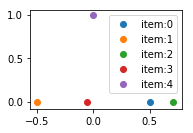

In [86]:
plt.subplot(224)
for i in range(len(evecs)):
    x = evecs[4][i]
    y = evecs[3][i]
    plt.scatter(x, y, label='item:%s'%(i))
plt.legend(loc=1)

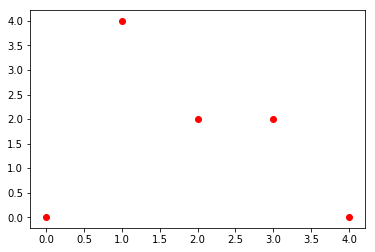

In [87]:
plt.scatter(range(len(evals)), evals, color='r')

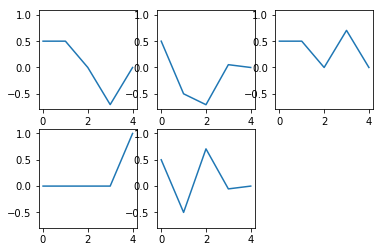

In [89]:
ax = plt.subplot(231)
for i in range(len(evecs[0])):
    plt.subplot(2,3,i+1, sharex=ax, sharey=ax)
    plt.plot(evecs[i])

### What do the above graphs mean

A spectral decomposition yields, lambdas: 0, 4, 2, 2, 0
The lowest eigenvalues are: 
(lambda_1 = 0) [0, 0, 0, 0, 1], and (lambda_2 = 2) [.5, -.5, .7, -.05, 0]
If we cut the graph by the eigenvector basis (eig_2), we get:
S will contain nodes (0, 2), and the rest in S_c (mincut)


Largest eigenvalued eigenvector basis:
[.5, -.5, -.7, .05, 0]

From the second eigenvector for eigenvalue 0, we get:
[.5, .5, 0, -.7, 0]
All nodes (o through 4) are assigned to S, except node 3 which is assigned to S_c. This gives a mincut of 0

### Clique sizes

In [238]:
g1x = list(nx.find_cliques(nx.from_numpy_matrix(G1)))
g2x = list(nx.find_cliques(nx.from_numpy_matrix(G2)))
g3x = list(nx.find_cliques(nx.from_numpy_matrix(G3)))
g4x = list(nx.find_cliques(nx.from_numpy_matrix(G4)))
g5x = list(nx.find_cliques(nx.from_numpy_matrix(G5)))
g6x = list(nx.find_cliques(nx.from_numpy_matrix(G6)))

KeyboardInterrupt: 

In [242]:
g1x[0], g2x[0], g3x[0], g4x[0], #g5x[0], g6x[0]

([0, 1], [0, 2, 8, 18], [2, 1, 41, 35], [0, 48])

In [253]:
def set_selective(sel, G):
    gx = np.zeros_like(G[0])
    gx[sel] = 1
    return gx

In [254]:
gx = set_selective(np.array([3, 8, 18, 5, 16, 12]), G2)
np.savetxt('problem3graph2.csv', gx, fmt='%u', newline=',', delimiter=',')

In [255]:
gx = set_selective(np.array([2, 30, 42, 31, 43, 25, 13, 39]), G3)
np.savetxt('problem3graph3.csv', gx, fmt='%u', newline=',', delimiter=',')

In [256]:
gx = set_selective(np.array([1, 49, 18]), G4)
np.savetxt('problem3graph4.csv', gx, fmt='%u', newline=',', delimiter=',')

In [257]:
gx = set_selective(np.array([0, 327, 298]), G5)
np.savetxt('problem3graph5.csv', gx, fmt='%u', newline=',', delimiter=',')

In [258]:
gx = set_selective(np.array([1, 246, 87, 348, 498, 496, 418, 355, 29, 372, 186, 84, 94]), G6)
np.savetxt('problem3graph6.csv', gx, fmt='%u', newline=',', delimiter=',')

In [252]:
g2x = np.zeros_like(G2[0])
sel = np.array([3, 8, 18, 5, 16, 12])
g2x[sel] = 1
g2x

np.savetxt('problem3graph1.csv', g1x[0], fmt='%u', newline=',', delimiter=',')

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])